In [25]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [26]:
import random
random.seed(113)

In [27]:
from sklearn.cluster import KMeans

In [28]:
from skimage.io import imread
from matplotlib import pyplot as plt
from skimage.segmentation import slic, felzenszwalb, mark_boundaries
from skimage.util import img_as_float
from skimage import io
import numpy as np

In [164]:
def mergex(mask, img):
    
    result = img.copy()
    
    result[:, :, 0] = mask * img[:, :, 0]
    result[:, :, 1] = mask * img[:, :, 1]
    result[:, :, 2] = mask * img[:, :, 2]
    
    return result

In [29]:
img = imread('modelo.jpg')

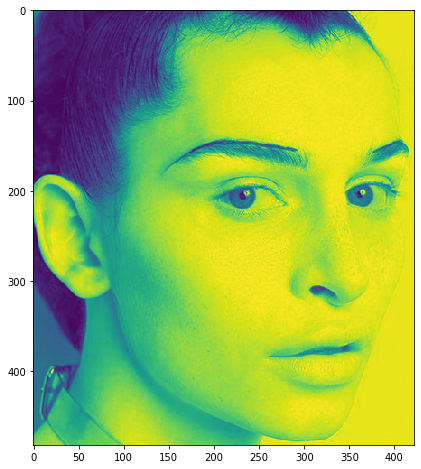

In [30]:
plt.figure(figsize = (10, 8))
plt.imshow(img[:, :, 0])

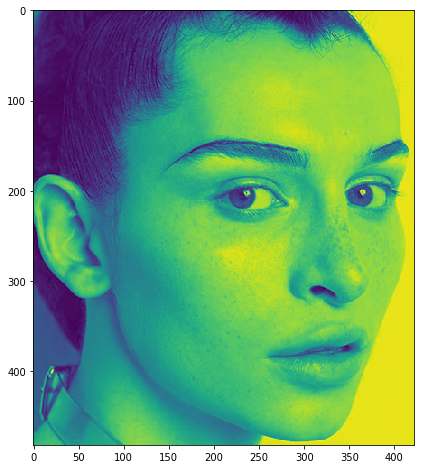

In [31]:
plt.figure(figsize = (10, 8))
plt.imshow(img[:,:,1])

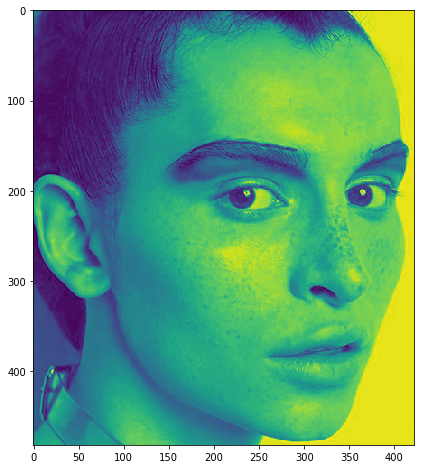

In [32]:
plt.figure(figsize = (10, 8))
plt.imshow(img[:,:,2])

In [132]:
img_ipunt = img[:,:,0].reshape((-1,1))
model = KMeans(n_clusters=5, init='k-means++').fit(img_ipunt)
result_clustered = model.labels_.reshape(img[:,:,0].shape)

In [133]:
np.unique(result_clustered)

array([0, 1, 2, 3, 4], dtype=int32)

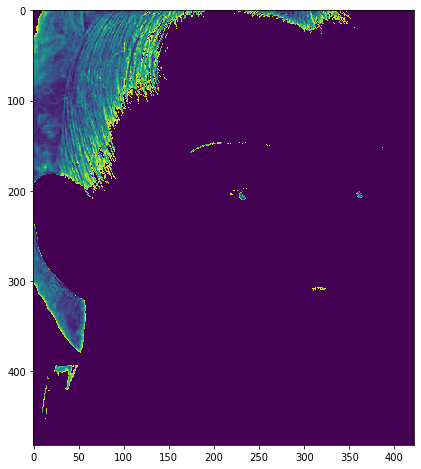

In [134]:
plt.figure(figsize = (10, 8))
plt.imshow((result_clustered == 0) * img[:, :, 0])

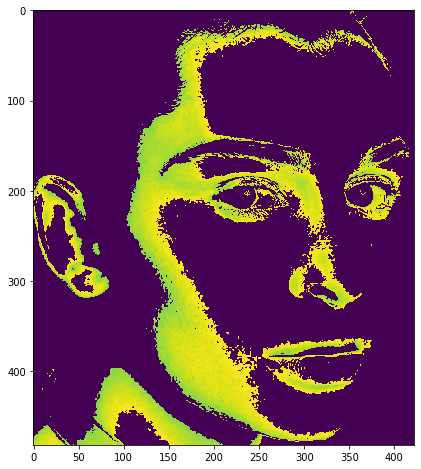

In [135]:
plt.figure(figsize = (10, 8))
plt.imshow((result_clustered == 1) * img[:, :, 0])

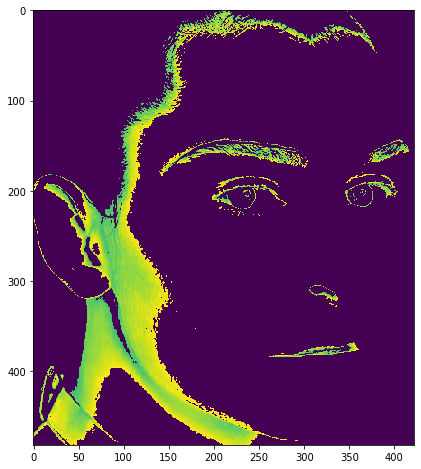

In [136]:
plt.figure(figsize = (10, 8))
plt.imshow((result_clustered == 2) * img[:, :, 0])

In [142]:
img_result1 = mergex(result_clustered == 0, img)
img_result2 = mergex(result_clustered == 1, img)
img_result3 = mergex(result_clustered == 2, img)
img_result4 = mergex(result_clustered == 3, img)
img_result5 = mergex(result_clustered == 4, img)

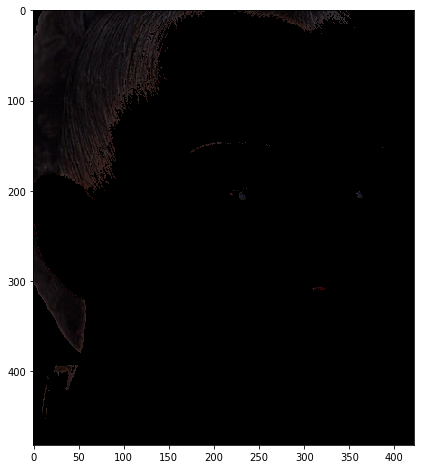

In [143]:
plt.figure(figsize = (10, 8))
plt.imshow(img_result1)

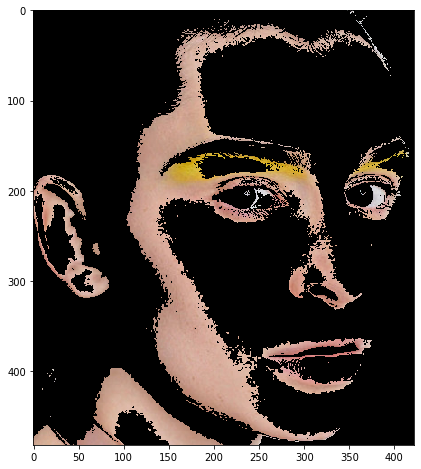

In [144]:
plt.figure(figsize = (10, 8))
plt.imshow(img_result2)

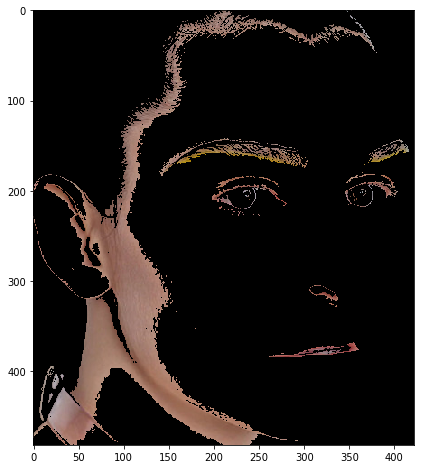

In [145]:
plt.figure(figsize = (10, 8))
plt.imshow(img_result3)

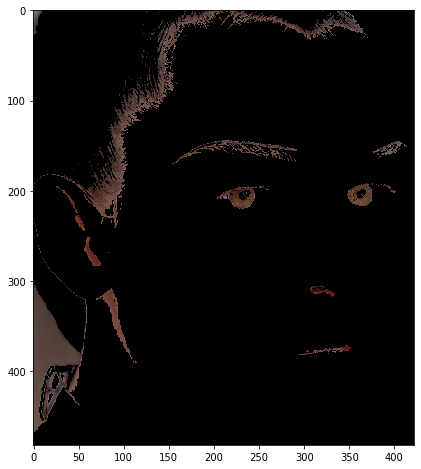

In [146]:
plt.figure(figsize = (10, 8))
plt.imshow(img_result4)

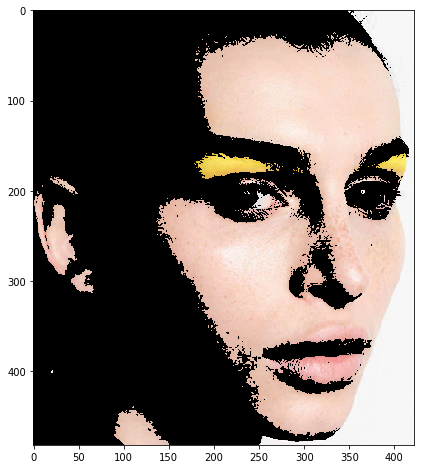

In [147]:
plt.figure(figsize = (10, 8))
plt.imshow(img_result5)

## Best Result -> img_result3

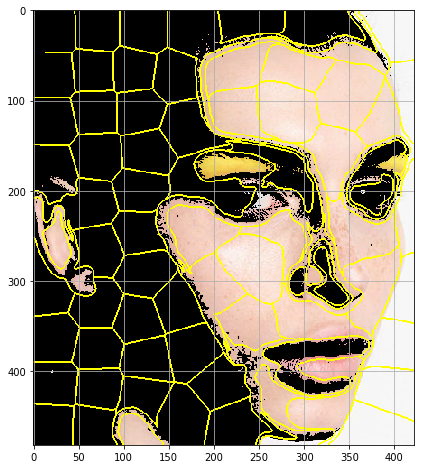

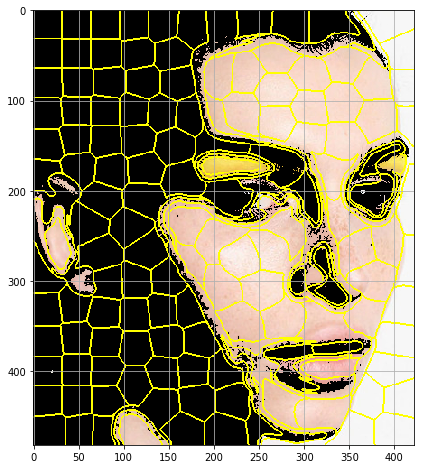

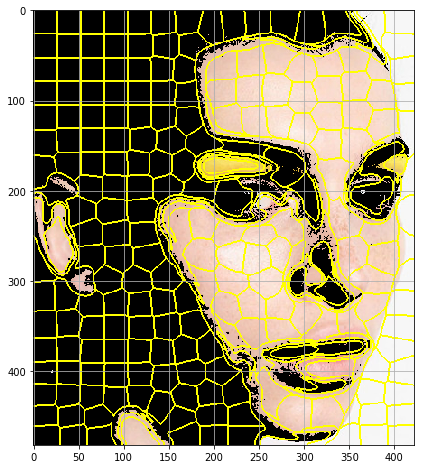

In [148]:
image = img_result5
for numSegments in (100, 200, 300):
  
    segments = slic(image, 
                    n_segments=numSegments, 
                    sigma=5)
    
    fig = plt.figure(figsize = (15, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments))
    plt.axis("on")
    plt.grid()
    
plt.show()

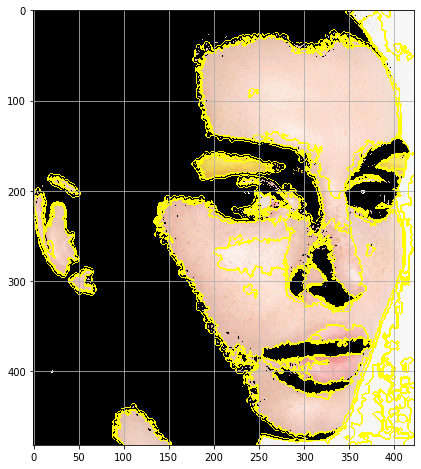

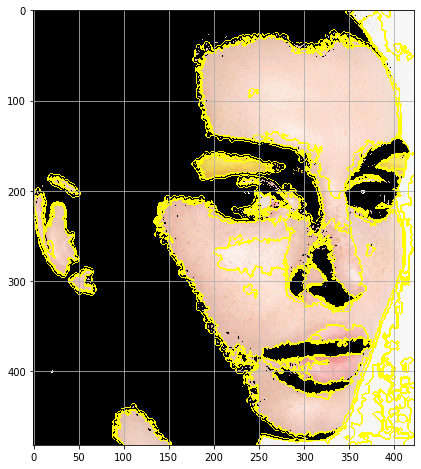

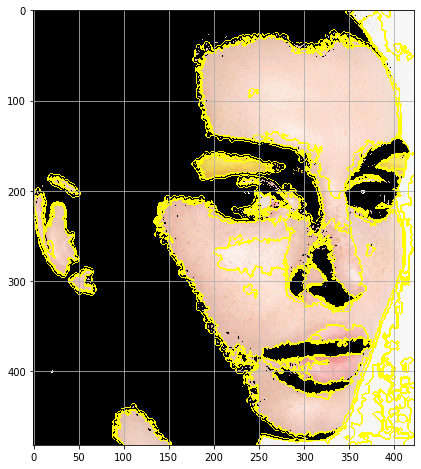

In [150]:
image = img_result5
for numSegments in (100, 200, 300):
  
    segments = segments_fz = felzenszwalb(image, 
                                          scale=100, 
                                          sigma=0.5,
                                          min_size=50)
    
    fig = plt.figure(figsize = (15, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments))
    plt.axis("on")
    plt.grid()
    
plt.show()

## Prevendo Novas Imagens

In [151]:
new_image = imread('ESSA.jpg')

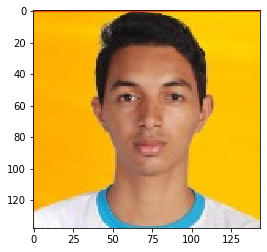

In [152]:
plt.imshow(new_image)

In [215]:
img_ipunt = new_image[:,:,1].reshape((-1, 1))
new_image_result = model.predict(img_ipunt).reshape(new_image[:,:,0].shape)

In [216]:
np.unique(new_image_result)

array([0, 1, 2, 3, 4], dtype=int32)

In [217]:
img_result1 = mergex(new_image_result == 0, new_image)
img_result2 = mergex(new_image_result == 1, new_image)
img_result3 = mergex(new_image_result == 2, new_image)
img_result4 = mergex(new_image_result == 3, new_image)
img_result5 = mergex(new_image_result == 4, new_image)

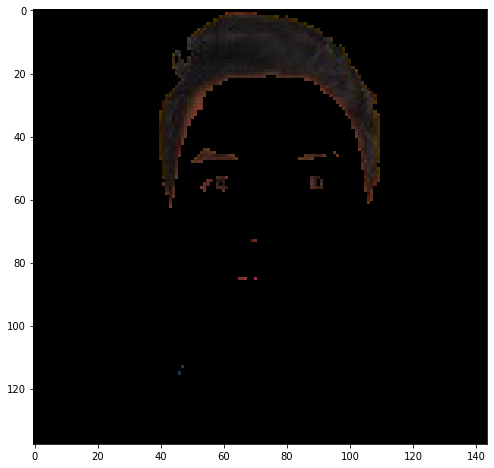

In [218]:
plt.figure(figsize = (15, 8))
plt.imshow(img_result1)

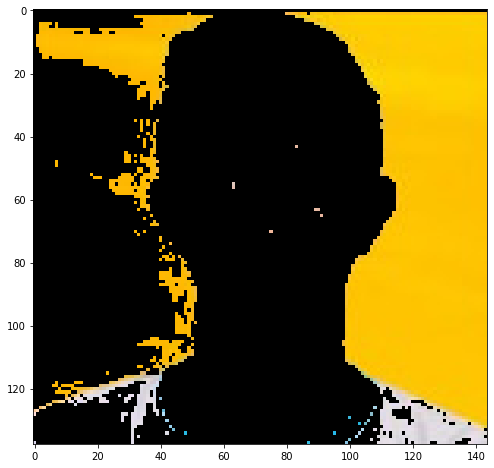

In [219]:
plt.figure(figsize = (15, 8))
plt.imshow(img_result2)

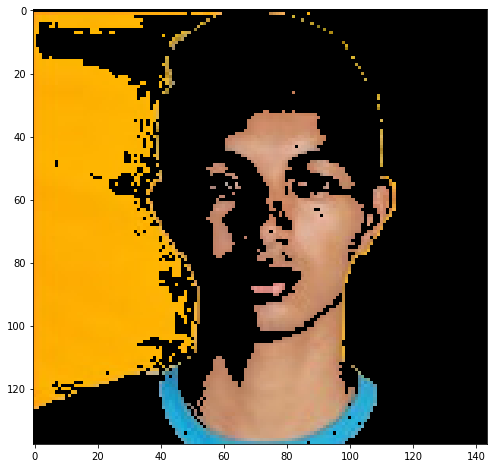

In [220]:
plt.figure(figsize = (15, 8))
plt.imshow(img_result3)

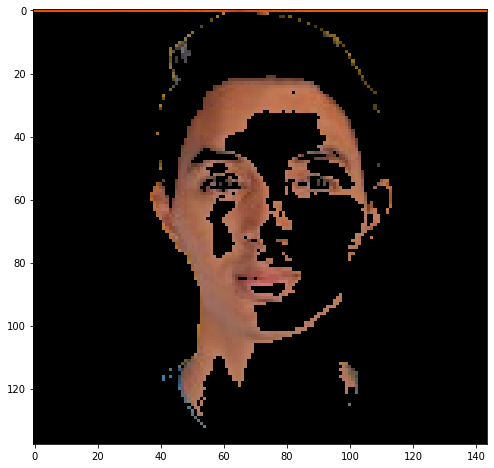

In [221]:
plt.figure(figsize = (15, 8))
plt.imshow(img_result4)

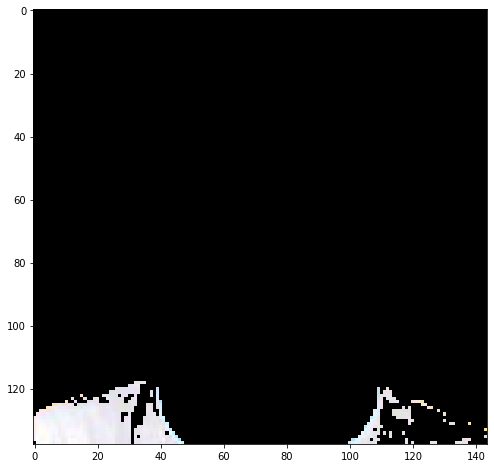

In [222]:
plt.figure(figsize = (15, 8))
plt.imshow(img_result5)